In [1]:
import sys
import os
import IPython.display as ipd
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont, ImageFilter, ImageChops
from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import A4
from reportlab.lib.utils import ImageReader
import io
import math
import textwrap
HOME_DIR = r'c:\Users\jordy\Documents\python\projects\GenAI_TCG'
sys.path.append(HOME_DIR)
from lib.artdesign import ArtDesignClient, CardLayers, Utils

art = ArtDesignClient()
utils = Utils()
target_card_size = (816, 1110)
corner_raduis = 30

## Mages


### icons

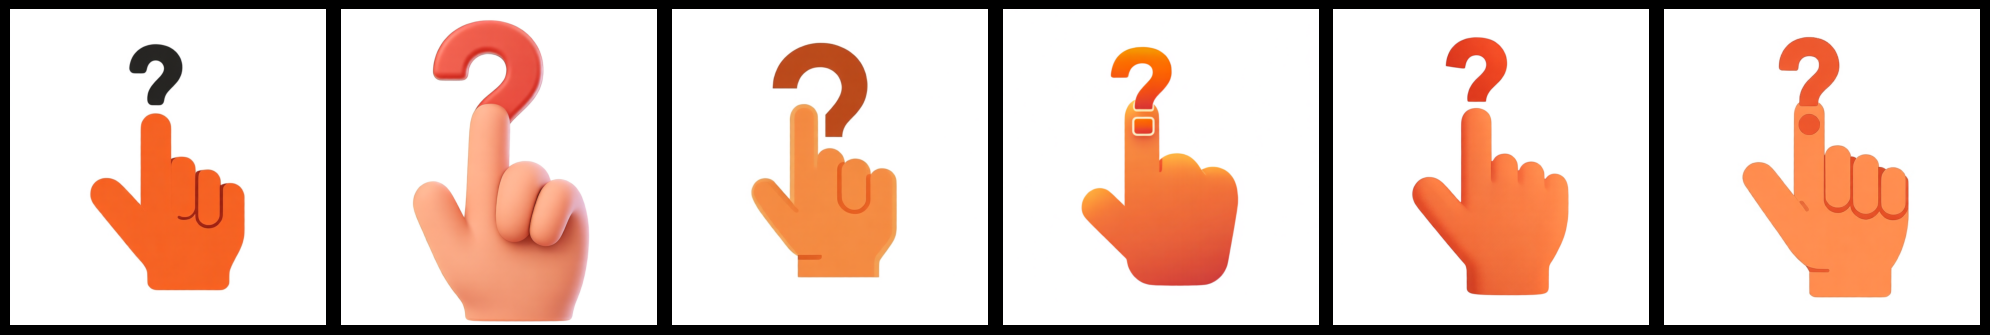

In [50]:
items = [
    'a white with black borders click icon hand with a finger in form of a question mark', # choose
]

prompts = []
for item in items:
    main_prompt = f"{item}"
    art_style = "\nWhite background\n4K, Flat, digital painting, high quality, minimalist"  # no color
    neg_prompt = "dark background, shadow, text, writing"
    prompts.append((main_prompt + art_style, neg_prompt))

images_list = art.run_prompts(prompts, size=(624, 624), im_number=6, shift=3.1, steps=20, cfg=5)
fig, axes = plt.subplots(1, 6, figsize=(20, 14), facecolor='black')
axes = axes.flatten()

for idx, img in enumerate(images_list):
    axes[idx].imshow(img)
    axes[idx].axis('off')
    axes[idx].set_facecolor('black')

plt.tight_layout()
plt.show()

### banner

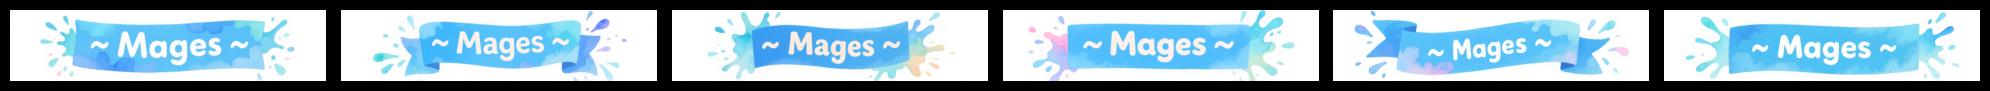

In [3]:
items = [
    'a blue banner written "~ Mages ~" with watercolor splash symbols around', # Boost
]

prompts = []
for item in items:
    main_prompt = f"{item}"
    art_style = "\nWhite background\n4K, Flat, digital painting, high quality, minimalist, in a retro design style, pastel colors"
    neg_prompt = "dark background, shadow, text, writing"
    prompts.append((main_prompt + art_style, neg_prompt))

images_list = art.run_prompts(prompts, size=(1100, 250), im_number=6, shift=3.1, steps=30, cfg=5)
fig, axes = plt.subplots(1, 6, figsize=(20, 10), facecolor='black')
axes = axes.flatten()

for idx, img in enumerate(images_list):
    axes[idx].imshow(img)
    axes[idx].axis('off')
    axes[idx].set_facecolor('black')

plt.tight_layout()
plt.show()

### cards illu

In [35]:
items = [
    'on the left side a big moon in the complete dark with some shiny stars, on the right side a big sun with 2 small white clouds. A mage wearing a long light-blue dress in between them', # Celestial reversal
    # 'A mage wearing a long light-blue dress with flowing fabrics looking at the camera and holding a fireball in one hand and an ice shard in the other background: earth in the space', # Thermic flux
    # 'A mage wearing a long light-blue dress with flowing fabrics, casting a spell of apathy to a group of treants with magic chains around their legs.' # Chains of apathy
    # 'A mage wearing a long light-blue dress with flowing fabrics, casting an apocalyptic ritual with dark clouds and lightning in the background', # Apocalyptic ritual
    # 'A gigantic black hole next to the Earth in a dramatic scene' # black hole
]

prompts = []
for item in items:
    main_prompt = f"{item}"
    art_style = "\ncozy soft pastel colors, gentle lighting, digital painting, delicate details, realistic, high quality"  # no color
    neg_prompt = ""
    prompts.append((main_prompt + art_style, neg_prompt))

images = []
for prompt in prompts:
    # Generate image
    image = art.run_prompts([prompt], size=target_card_size, im_number=4, shift=3.10, steps=30, cfg=5)
    images.append(image[0])

    # save image
    # output_filename = os.path.join(HOME_DIR, "lib", "artdesign", "cards", "Eng_house.png")
    # image[0].save(output_filename)


### Card frame

In [36]:
cl = CardLayers()

In [7]:
def add_layer_to_a_card_supfac(imBase_path, supfac, mana_cost, effect, name, id):
    blurring_radius = 16
    if supfac == "engineers":
        faction_logo_path = f'..\cards_assets\supfac_eng_banner.png'
    elif supfac == "mages":
        faction_logo_path = f'..\cards_assets\supfac_mag_banner.png'

    imBase = Image.open(imBase_path).convert('RGBA')

    # 0 - colored patches on the base image before blurring it (helping see numbers or markers/icons)
    # imBase = color_region(imBase, 1, 60, 45, 45, color="#DFDFDF", corner_radius=10)
    # imBase = color_triangle(imBase, -210, 400, int(200*1.8), int(120*1.8), color="#000000")

    # 1 - blur first so that the layers comes on top
    imBase = cl.transparent_colored_overlay(imBase, 0.01, 0.01, 0.14, 0.12, transparency_percent=40, color=(0, 0, 0), corner_radius_pct=0.02) # Dark transparent overlay for Condition / Effect
    imBase = cl.blur_region(imBase, 0.01, 0.01, 0.14, 0.12, gauss_radius=blurring_radius, corner_radius_pct=0.02, transp_edge_percent=0.0)   # (w start %, h start %, w %, h %) Blurring for top-left icons

    imBase = cl.transparent_colored_overlay(imBase, 0.75-0.005, 1-0.20-0.005, 1-0.75-0.005, 0.20, transparency_percent=40, color=(0, 0, 0), corner_radius_pct=0.05) # Dark transparent overlay for Condition / Effect
    imBase = cl.blur_region(imBase, 0.75-0.005, 1-0.20-0.005, 1-0.75-0.005, 0.20, gauss_radius=blurring_radius, corner_radius_pct=0.05, transp_edge_percent=0.0)   # (w start %, h start %, w %, h %) Blurring for Condition / Effect
    
    # imBase = cl.transparent_colored_overlay(imBase, 0.82, 0.3, 1-0.82-0.005, 0.45, transparency_percent=40, color=(0, 0, 0), corner_radius_pct=0.03) # Dark transparent overlay for BANNER
    # imBase = cl.blur_region(imBase, 0.82, 0.3, 1-0.82-0.005, 0.45, gauss_radius=blurring_radius, corner_radius_pct=0.03, transp_edge_percent=0.0)  # (w start %, h start %, w %, h %) Faction logo

    # 2 - markers & texts
    #   2.1 - Top left markers
    imBase = cl.add_image_overlay(imBase, r'..\cards_assets\marker_mana.png', (0.003, 0.01), round_corners_radius=None, white_to_transp=False, resize_scale=0.6)                 # Mana marker
    imBase = cl.add_text_overlay(imBase, str(mana_cost), (0.003+0.075, 0.077), color="#FFFFFF", font_size_pct=0.07)                                                            # Mana cost

    #   2.2 - Faction logo
    imBase = cl.add_image_overlay(imBase, faction_logo_path, (0.85, 0.3), round_corners_radius=None, white_to_transp=False, resize_scale=0.45, rotate=-90)                 # Faction marker

    #   region 2.4 - effect
    if effect == "celestial reversal":
        imBase = cl.add_image_overlay(imBase, r'..\cards_assets\cond_night.png', (0.73, 0.81), round_corners_radius=0.0, white_to_transp=False, resize_scale=0.16)
        imBase = cl.add_text_overlay(imBase, '/', (0.86+0.003, 0.855+0.003), color="#0d1936", font_size_pct=0.07)       # Value number shadow
        imBase = cl.add_text_overlay(imBase, '/', (0.86,       0.855), color='white', font_size_pct=0.06, rotate=0)       # Value number
        imBase = cl.add_image_overlay(imBase, r'..\cards_assets\cond_day.png', (0.87, 0.81), round_corners_radius=0.0, white_to_transp=False, resize_scale=0.16)
        imBase = cl.add_image_overlay(imBase, r'..\cards_assets\marker_choice.png', (0.8, 0.9), round_corners_radius=0.0, white_to_transp=False, resize_scale=0.16)
    elif effect == "thermic flux":
        imBase = cl.add_image_overlay(imBase, r'..\cards_assets\cond_hot_T.png', (0.73, 0.81), round_corners_radius=0.0, white_to_transp=False, resize_scale=0.16)
        imBase = cl.add_text_overlay(imBase, '+/- 4', (0.89+0.003, 0.855+0.003), color="#0d1936", font_size_pct=0.08)       # Value number shadow
        imBase = cl.add_text_overlay(imBase, '+/- 4', (0.89,       0.855), color='white', font_size_pct=0.075, rotate=0)       # Value number
        imBase = cl.add_image_overlay(imBase, r'..\cards_assets\marker_choice.png', (0.8, 0.9), round_corners_radius=0.0, white_to_transp=False, resize_scale=0.16)
    elif effect == 'nobody moves':
        imBase = cl.add_image_overlay(imBase, r'..\cards_assets\effect_nobodymoves.png', (0.8, 0.85), round_corners_radius=0.0, white_to_transp=False, resize_scale=0.16)
    elif effect == 'apocalyptic ritual':
        imBase = cl.add_image_overlay(imBase, r'..\cards_assets\cond_cata.png', (0.8, 0.81), round_corners_radius=0.0, white_to_transp=False, resize_scale=0.16)
        imBase = cl.add_image_overlay(imBase, r'..\cards_assets\marker_choice.png', (0.8, 0.9), round_corners_radius=0.0, white_to_transp=False, resize_scale=0.16)
    elif effect == 'black hole':
        imBase = cl.add_image_overlay(imBase, r'..\cards_assets\marker_house.png', (0.74, 0.79), round_corners_radius=0.0, white_to_transp=False, resize_scale=0.18)
        imBase = cl.add_image_overlay(imBase, r'..\cards_assets\tap_out.png', (0.835, 0.775), round_corners_radius=0.0, white_to_transp=False, resize_scale=0.22)
        imBase = cl.add_image_overlay(imBase, r'..\cards_assets\marker_earth.png', (0.75, 0.89), round_corners_radius=0.0, white_to_transp=False, resize_scale=0.17)             # earth
        imBase = cl.add_text_overlay(imBase, '3', (0.93+0.003, 0.93+0.003), color="#0d1936", font_size_pct=0.09)       # Value number shadow
        imBase = cl.add_text_overlay(imBase, '3', (0.93,       0.93), color='white', font_size_pct=0.085, rotate=0)       # Value number
        imBase = cl.add_image_overlay(imBase, r'..\cards_assets\marker_arrow.png', (0.82, 0.925), round_corners_radius=0.0, white_to_transp=False, resize_scale=0.09, rotate=-145) # arrow
        imBase = cl.add_image_overlay(imBase, r'..\cards_assets\marker_arrow.png', (0.82, 0.868), round_corners_radius=0.0, white_to_transp=False, resize_scale=0.09, rotate=180-145, flip=True) # arrow

    elif effect == 'draw 1 p':
        imBase = cl.add_image_overlay(imBase, r'..\cards_assets\marker_card_p.png', (0.50, 0.81), round_corners_radius=0.0, white_to_transp=False, resize_scale=0.24)                   # card
        imBase = cl.add_text_overlay(imBase, '+1', (0.595,       0.88), color='white', font_size_pct=0.06, rotate=0)       # Value number
        imBase = cl.add_image_overlay(imBase, r'..\cards_assets\marker_arrow.png', (0.67, 0.83), round_corners_radius=0.0, white_to_transp=False, resize_scale=0.12)                    # arrow
        imBase = cl.add_image_overlay(imBase, r'..\cards_assets\effect_draw_p.png', (0.75, 0.815), round_corners_radius=0.0, white_to_transp=False, resize_scale=0.30)                   # draw icon
    elif effect == 'jump 2':
        imBase = cl.add_image_overlay(imBase, r'..\cards_assets\marker_parachute.png', (0.73, 0.79), round_corners_radius=0.0, white_to_transp=False, resize_scale=0.20)
        imBase = cl.add_image_overlay(imBase, r'..\cards_assets\marker_instant.png', (0.85, 0.79), round_corners_radius=0.0, white_to_transp=False, resize_scale=0.20)
        imBase = cl.add_image_overlay(imBase, r'..\cards_assets\effect_jump_white.png', (0.74, 0.89), round_corners_radius=0.0, white_to_transp=False, resize_scale=0.20)
        imBase = cl.add_text_overlay(imBase, '+2', (0.92+0.003, 0.95+0.003), color="#0d1936", font_size_pct=0.11)       # Value number shadow
        imBase = cl.add_text_overlay(imBase, '+2', (0.92,       0.95), color='white', font_size_pct=0.1, rotate=0)       # Value number
    elif effect == 'landmine':
        imBase = cl.add_image_overlay(imBase, r'..\cards_assets\marker_parachute.png', (0.73, 0.79), round_corners_radius=0.0, white_to_transp=False, resize_scale=0.20)
        imBase = cl.add_image_overlay(imBase, r'..\cards_assets\marker_instant.png', (0.85, 0.79), round_corners_radius=0.0, white_to_transp=False, resize_scale=0.20)
        imBase = cl.add_image_overlay(imBase, r'..\cards_assets\effect_landmine.png', (0.80, 0.88), round_corners_radius=0.0, white_to_transp=False, resize_scale=0.20)
    elif effect == 'refinery':
        imBase = cl.add_image_overlay(imBase, r'..\cards_assets\marker_house.png', (0.74, 0.79), round_corners_radius=0.0, white_to_transp=False, resize_scale=0.18)
        imBase = cl.add_image_overlay(imBase, r'..\cards_assets\tap_out.png', (0.835, 0.775), round_corners_radius=0.0, white_to_transp=False, resize_scale=0.22)
        imBase = cl.add_image_overlay(imBase, r'..\cards_assets\marker_card_p.png', (0.73, 0.89), round_corners_radius=0.0, white_to_transp=False, resize_scale=0.17)                   # card
        imBase = cl.add_text_overlay(imBase, '+1', (0.795,       0.94), color='white', font_size_pct=0.04, rotate=0)       # Value number
        imBase = cl.add_image_overlay(imBase, r'..\cards_assets\marker_arrow.png', (0.835, 0.9), round_corners_radius=0.0, white_to_transp=False, resize_scale=0.09)                    # arrow
        imBase = cl.add_image_overlay(imBase, r'..\cards_assets\effect_draw_p.png', (0.89, 0.9), round_corners_radius=0.0, white_to_transp=False, resize_scale=0.2)                   # draw icon
    # endregion 2.4 - effect

    #   2.5 - card name banner & card name
    # imBase = cl.color_region(imBase, ((1-0.73)/2), 1-0.05-0.01, 0.73, 0.05, color=banner_border_color, corner_radius_pct=0.03, transp_edge_percent=0.0)    # Black banner -border-  under card name
    # imBase = cl.color_region(imBase, 0.3/2, 1-0.05-0.01, 0.7, 0.05, color="#000000", corner_radius_pct=0.03, transp_edge_percent=0.0)    # Black banner under card name
    # imBase = cl.add_text_overlay(imBase, name, (0.5, 1-0.035), color=banner_txt_color, font_size_pct=0.05)   # card name

    imBase = imBase.resize((816, 1110), Image.LANCZOS)
    imBase = cl.round_corners(imBase, radius=corner_raduis)   # Round the corners of the final card
    
    output_filename = os.path.join(HOME_DIR, "lib", "artdesign", "cards_framed", f"{id}.png")
    imBase.save(output_filename)
    imBase.show()

add_layer_to_a_card_supfac(r'..\cards_ex\Mag_celestial_reversal.png', "mages", mana_cost=2, effect="celestial reversal", name="Celestial reversal", id="Mag_Celestial_reversal")
add_layer_to_a_card_supfac(r'..\cards_ex\Mag_thermicflux.png', "mages", mana_cost=2, effect="thermic flux", name="thermic flux", id="Mag_thermic_flux")
add_layer_to_a_card_supfac(r'..\cards_ex\Mag_chains_of_apathy.png', "mages", mana_cost=3, effect="nobody moves", name="nobody moves", id="Mag_nobodymoves")
add_layer_to_a_card_supfac(r'..\cards_ex\Mag_apocalyptic_ritual.png', "mages", mana_cost=3, effect="apocalyptic ritual", name="Apocalyptic ritual", id="Mag_Apocalypticritual")
add_layer_to_a_card_supfac(r'..\cards_ex\Mag_black_hole.png', "mages", mana_cost=3, effect="black hole", name="Black hole", id="Mag_black_hole")


<>:4: SyntaxWarning: invalid escape sequence '\c'
<>:6: SyntaxWarning: invalid escape sequence '\c'
<>:4: SyntaxWarning: invalid escape sequence '\c'
<>:6: SyntaxWarning: invalid escape sequence '\c'
C:\Users\jordy\AppData\Local\Temp\ipykernel_10080\1243421715.py:4: SyntaxWarning: invalid escape sequence '\c'
  faction_logo_path = f'..\cards_assets\supfac_eng_banner.png'
C:\Users\jordy\AppData\Local\Temp\ipykernel_10080\1243421715.py:6: SyntaxWarning: invalid escape sequence '\c'
  faction_logo_path = f'..\cards_assets\supfac_mag_banner.png'


## Engineers

### icons

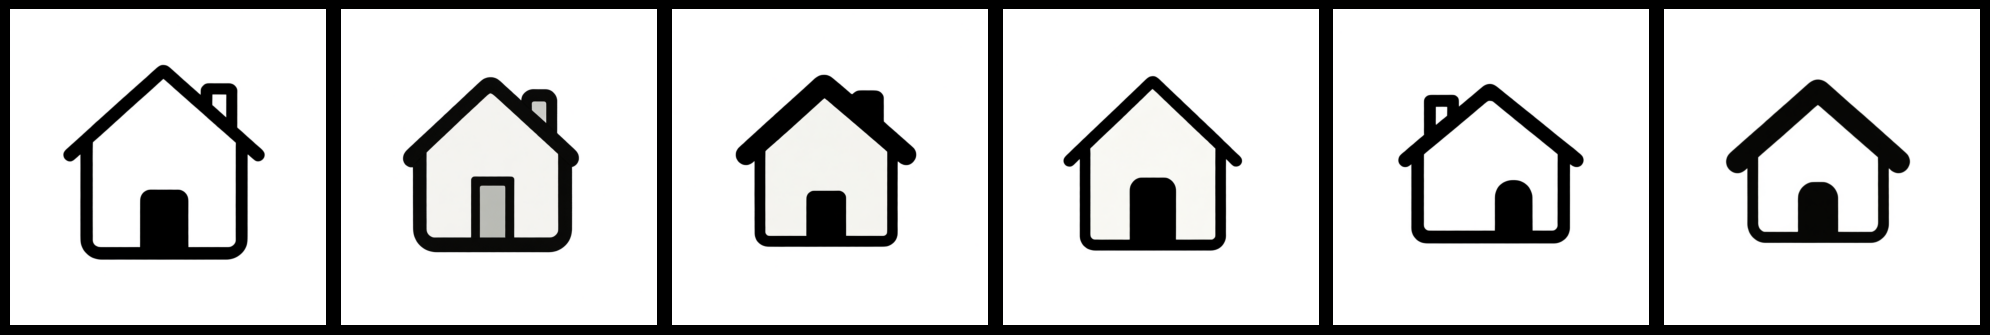

In [60]:
items = [
    # 'a red speed boost pill with a yellow lightning bolt logo on it. Attached to a dark blue parachute', # Boost
    # 'a logo of a huge spring with a large platform painted in yellow and black caution paint on top' # trampoline
    # 'a shiny dark green glue slowing puddle logo' # slowing trap
    # 'a dark green thick manhole cover with a small red light on top. Attached to a dark brown parachute', # Boost
    'a small white house with black borders icon' # refinery
    # 'a simple parachute logo' # marker parachute
    # 'a simple white with small black borders icon of a chronometer with speed lines on the left'
]

prompts = []
for item in items:
    main_prompt = f"{item}"
    art_style = "\nWhite background\n4K, Flat, digital painting, high quality, minimalist"  # no color
    neg_prompt = "dark background, shadow, text, writing"
    prompts.append((main_prompt + art_style, neg_prompt))

images_list = art.run_prompts(prompts, size=(624, 624), im_number=6, shift=3.1, steps=20, cfg=5)
fig, axes = plt.subplots(1, 6, figsize=(20, 14), facecolor='black')
axes = axes.flatten()

for idx, img in enumerate(images_list):
    axes[idx].imshow(img)
    axes[idx].axis('off')
    axes[idx].set_facecolor('black')

plt.tight_layout()
plt.show()

### banner

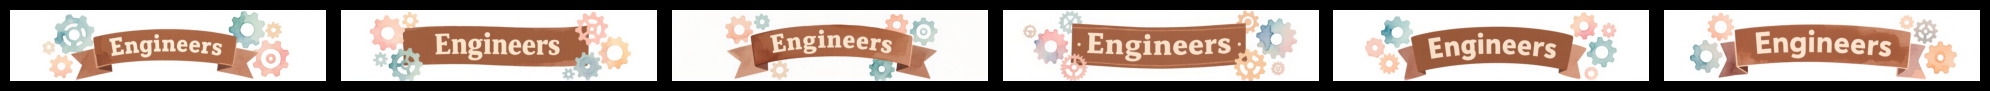

In [8]:
items = [
    'a brown banner written "Engineers" with watercolor gears symbols around', # Boost
]

prompts = []
for item in items:
    main_prompt = f"{item}"
    art_style = "\nWhite background\n4K, Flat, digital painting, high quality, minimalist, in a retro design style, pastel colors"
    neg_prompt = "dark background, shadow, text, writing"
    prompts.append((main_prompt + art_style, neg_prompt))

images_list = art.run_prompts(prompts, size=(1100, 250), im_number=6, shift=3.1, steps=30, cfg=5)
fig, axes = plt.subplots(1, 6, figsize=(20, 10), facecolor='black')
axes = axes.flatten()

for idx, img in enumerate(images_list):
    axes[idx].imshow(img)
    axes[idx].axis('off')
    axes[idx].set_facecolor('black')

plt.tight_layout()
plt.show()

### cards illu

In [ ]:
items = [
    # 'a small red speed boost pill with a yellow lightning bolt logo on it. Attached to a dark blue parachute landing on a steep path in the mountain', # boost
    # 'a huge spring with a large platform painted in yellow and black caution paint on top. The spring emerging from a dirt path in the middle of a vast arid desert' # trampoline
    # 'a disgusting, green, slimy puddle on a dirt path surrounded by jungle with a colorful parrot stuck in it' # slowing trap
    # 'a military-colored thick manhole cover with small red LED on top, placed on a muddy dirt path, slightly hidden by small branches; there\'s a big storm with lightning', # landmine
    # 'A gigantic refinery in a very dark night with glowing orange smoke coming out of the chimneys a small moon and very little stars' # refinery
]

prompts = []
for item in items:
    main_prompt = f"{item}"
    art_style = "\ncozy soft pastel colors, gentle lighting, digital painting, delicate details, realistic, high quality"  # no color
    neg_prompt = ""
    prompts.append((main_prompt + art_style, neg_prompt))

images = []
for prompt in prompts:
    # Generate image
    image = art.run_prompts([prompt], size=target_card_size, im_number=1, shift=3.10, steps=30, cfg=5)
    images.append(image[0])

    # save image
    # output_filename = os.path.join(HOME_DIR, "lib", "artdesign", "cards", "Eng_house.png")
    # image[0].save(output_filename)

fig, axes = plt.subplots(1, len(images), figsize=(10 * len(images), 8), facecolor='black')
if len(images) == 1:
    axes = [axes]
for idx, img in enumerate(images):
    axes[idx].imshow(img)
    axes[idx].axis('off')
    axes[idx].set_facecolor('black')
plt.tight_layout()
plt.show()

### Card frame

In [3]:
cl = CardLayers()

In [8]:
def add_layer_to_a_card_supfac(imBase_path, supfac, mana_cost, effect, name, id):
    blurring_radius = 16
    if supfac == "engineers":
        faction_logo_path = f'..\cards_assets\supfac_eng_banner.png'
    elif supfac == "mages":
        faction_logo_path = f'..\cards_assets\supfac_mag_banner.png'

    imBase = Image.open(imBase_path).convert('RGBA')

    # 0 - colored patches on the base image before blurring it (helping see numbers or markers/icons)
    # imBase = color_region(imBase, 1, 60, 45, 45, color="#DFDFDF", corner_radius=10)
    # imBase = color_triangle(imBase, -210, 400, int(200*1.8), int(120*1.8), color="#000000")

    # 1 - blur first so that the layers comes on top
    imBase = cl.transparent_colored_overlay(imBase, 0.01, 0.01, 0.14, 0.12, transparency_percent=40, color=(0, 0, 0), corner_radius_pct=0.02) # Dark transparent overlay for Condition / Effect
    imBase = cl.blur_region(imBase, 0.01, 0.01, 0.14, 0.12, gauss_radius=blurring_radius, corner_radius_pct=0.02, transp_edge_percent=0.0)   # (w start %, h start %, w %, h %) Blurring for top-left icons

    imBase = cl.transparent_colored_overlay(imBase, 0.75-0.005, 1-0.20-0.005, 1-0.75-0.005, 0.20, transparency_percent=40, color=(0, 0, 0), corner_radius_pct=0.05) # Dark transparent overlay for Condition / Effect
    imBase = cl.blur_region(imBase, 0.75-0.005, 1-0.20-0.005, 1-0.75-0.005, 0.20, gauss_radius=blurring_radius, corner_radius_pct=0.05, transp_edge_percent=0.0)   # (w start %, h start %, w %, h %) Blurring for Condition / Effect
    
    # imBase = cl.transparent_colored_overlay(imBase, 0.82, 0.3, 1-0.82-0.005, 0.45, transparency_percent=40, color=(0, 0, 0), corner_radius_pct=0.03) # Dark transparent overlay for BANNER
    # imBase = cl.blur_region(imBase, 0.82, 0.3, 1-0.82-0.005, 0.45, gauss_radius=blurring_radius, corner_radius_pct=0.03, transp_edge_percent=0.0)  # (w start %, h start %, w %, h %) Faction logo

    # 2 - markers & texts
    #   2.1 - Top left markers
    imBase = cl.add_image_overlay(imBase, r'..\cards_assets\marker_mana.png', (0.003, 0.01), round_corners_radius=None, white_to_transp=False, resize_scale=0.6)                 # Mana marker
    imBase = cl.add_text_overlay(imBase, str(mana_cost), (0.003+0.075, 0.077), color="#FFFFFF", font_size_pct=0.07)                                                            # Mana cost

    #   2.2 - Faction logo
    imBase = cl.add_image_overlay(imBase, faction_logo_path, (0.85, 0.3), round_corners_radius=None, white_to_transp=False, resize_scale=0.45, rotate=-90)                 # Faction marker

    #   region 2.4 - effect
    if effect == "+2 p":
        imBase = cl.add_image_overlay(imBase, r'..\cards_assets\marker_parachute.png', (0.8, 0.79), round_corners_radius=0.0, white_to_transp=False, resize_scale=0.20)
        imBase = cl.add_image_overlay(imBase, r'..\cards_assets\effect_advancing.png', (0.73, 0.89), round_corners_radius=0.0, white_to_transp=False, resize_scale=0.20)
        imBase = cl.add_text_overlay(imBase, '+2', (0.92+0.003, 0.95+0.003), color="#0d1936", font_size_pct=0.11)       # Value number shadow
        imBase = cl.add_text_overlay(imBase, '+2', (0.92,       0.95), color='white', font_size_pct=0.1, rotate=0)       # Value number
    elif effect == '-1 p':
        imBase = cl.add_image_overlay(imBase, r'..\cards_assets\marker_parachute.png', (0.8, 0.79), round_corners_radius=0.0, white_to_transp=False, resize_scale=0.20)
        imBase = cl.add_image_overlay(imBase, r'..\cards_assets\effect_regressing.png', (0.74, 0.89), round_corners_radius=0.0, white_to_transp=False, resize_scale=0.20)
        imBase = cl.add_text_overlay(imBase, '-1', (0.92+0.003, 0.95+0.003), color="#0d1936", font_size_pct=0.11)       # Value number shadow
        imBase = cl.add_text_overlay(imBase, '-1', (0.92,       0.95), color='white', font_size_pct=0.1, rotate=0)       # Value number
    elif effect == 'draw 1 p':
        imBase = cl.add_image_overlay(imBase, r'..\cards_assets\marker_card_p.png', (0.50, 0.81), round_corners_radius=0.0, white_to_transp=False, resize_scale=0.24)                   # card
        imBase = cl.add_text_overlay(imBase, '+1', (0.595,       0.88), color='white', font_size_pct=0.06, rotate=0)       # Value number
        imBase = cl.add_image_overlay(imBase, r'..\cards_assets\marker_arrow.png', (0.67, 0.83), round_corners_radius=0.0, white_to_transp=False, resize_scale=0.12)                    # arrow
        imBase = cl.add_image_overlay(imBase, r'..\cards_assets\effect_draw_p.png', (0.75, 0.815), round_corners_radius=0.0, white_to_transp=False, resize_scale=0.30)                   # draw icon
    elif effect == 'jump 2':
        imBase = cl.add_image_overlay(imBase, r'..\cards_assets\marker_parachute.png', (0.8, 0.79), round_corners_radius=0.0, white_to_transp=False, resize_scale=0.20)
        imBase = cl.add_image_overlay(imBase, r'..\cards_assets\effect_jump_white.png', (0.74, 0.89), round_corners_radius=0.0, white_to_transp=False, resize_scale=0.20)
        imBase = cl.add_text_overlay(imBase, '+2', (0.92+0.003, 0.95+0.003), color="#0d1936", font_size_pct=0.11)       # Value number shadow
        imBase = cl.add_text_overlay(imBase, '+2', (0.92,       0.95), color='white', font_size_pct=0.1, rotate=0)       # Value number
    elif effect == 'landmine':
        imBase = cl.add_image_overlay(imBase, r'..\cards_assets\marker_parachute.png', (0.8, 0.79), round_corners_radius=0.0, white_to_transp=False, resize_scale=0.20)
        imBase = cl.add_image_overlay(imBase, r'..\cards_assets\effect_landmine.png', (0.80, 0.88), round_corners_radius=0.0, white_to_transp=False, resize_scale=0.20)
    elif effect == 'refinery':
        imBase = cl.add_image_overlay(imBase, r'..\cards_assets\marker_house.png', (0.74, 0.79), round_corners_radius=0.0, white_to_transp=False, resize_scale=0.18)
        imBase = cl.add_image_overlay(imBase, r'..\cards_assets\tap_out.png', (0.835, 0.775), round_corners_radius=0.0, white_to_transp=False, resize_scale=0.22)
        imBase = cl.add_image_overlay(imBase, r'..\cards_assets\marker_card_p.png', (0.73, 0.89), round_corners_radius=0.0, white_to_transp=False, resize_scale=0.17)                   # card
        imBase = cl.add_text_overlay(imBase, '+1', (0.795,       0.94), color='white', font_size_pct=0.04, rotate=0)       # Value number
        imBase = cl.add_image_overlay(imBase, r'..\cards_assets\marker_arrow.png', (0.835, 0.9), round_corners_radius=0.0, white_to_transp=False, resize_scale=0.09)                    # arrow
        imBase = cl.add_image_overlay(imBase, r'..\cards_assets\effect_draw_p.png', (0.89, 0.9), round_corners_radius=0.0, white_to_transp=False, resize_scale=0.2)                   # draw icon
    # endregion 2.4 - effect

    #   2.5 - card name banner & card name
    # imBase = cl.color_region(imBase, ((1-0.73)/2), 1-0.05-0.01, 0.73, 0.05, color=banner_border_color, corner_radius_pct=0.03, transp_edge_percent=0.0)    # Black banner -border-  under card name
    # imBase = cl.color_region(imBase, 0.3/2, 1-0.05-0.01, 0.7, 0.05, color="#000000", corner_radius_pct=0.03, transp_edge_percent=0.0)    # Black banner under card name
    # imBase = cl.add_text_overlay(imBase, name, (0.5, 1-0.035), color=banner_txt_color, font_size_pct=0.05)   # card name

    imBase = imBase.resize((816, 1110), Image.LANCZOS)
    imBase = cl.round_corners(imBase, radius=corner_raduis)   # Round the corners of the final card
    
    output_filename = os.path.join(HOME_DIR, "lib", "artdesign", "cards_framed", f"{id}.png")
    imBase.save(output_filename)
    imBase.show()

add_layer_to_a_card_supfac(r'..\cards_ex\Eng_boost.png', "engineers", mana_cost=1, effect="+2 p", name="boost pill", id="Eng_boost")
add_layer_to_a_card_supfac(r'..\cards_ex\Eng_trampoline.png', "engineers", mana_cost=1, effect="jump 2", name="trampoline", id="Eng_trampoline")
add_layer_to_a_card_supfac(r'..\cards_ex\Eng_gluetrap.png', "engineers", mana_cost=1, effect="-1 p", name="-1 p", id="Eng_gluetrap")
add_layer_to_a_card_supfac(r'..\cards_ex\Eng_landmine.png', "engineers", mana_cost=3, effect="landmine", name="landmine", id="Eng_landmine")
add_layer_to_a_card_supfac(r'..\cards_ex\Eng_reffinery.png', "engineers", mana_cost=3, effect="refinery", name="refinery", id="Eng_refinery")

<>:4: SyntaxWarning: invalid escape sequence '\c'
<>:6: SyntaxWarning: invalid escape sequence '\c'
<>:4: SyntaxWarning: invalid escape sequence '\c'
<>:6: SyntaxWarning: invalid escape sequence '\c'
C:\Users\jordy\AppData\Local\Temp\ipykernel_10080\1778164412.py:4: SyntaxWarning: invalid escape sequence '\c'
  faction_logo_path = f'..\cards_assets\supfac_eng_banner.png'
C:\Users\jordy\AppData\Local\Temp\ipykernel_10080\1778164412.py:6: SyntaxWarning: invalid escape sequence '\c'
  faction_logo_path = f'..\cards_assets\supfac_mag_banner.png'


## Doctors

### banner

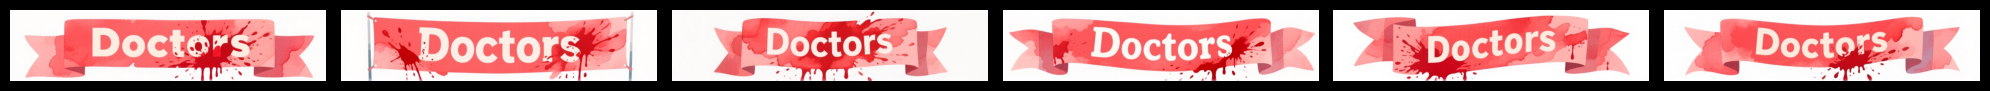

In [19]:
items = [
    'a red banner written "Doctors" with watercolor blood stains',
]

prompts = []
for item in items:
    main_prompt = f"{item}"
    art_style = "\nWhite background\n4K, Flat, digital painting, high quality, minimalist, in a retro design style, pastel colors"
    neg_prompt = "dark background, shadow, text, writing"
    prompts.append((main_prompt + art_style, neg_prompt))

images_list = art.run_prompts(prompts, size=(1100, 250), im_number=6, shift=3.1, steps=30, cfg=5)
fig, axes = plt.subplots(1, 6, figsize=(20, 10), facecolor='black')
axes = axes.flatten()

for idx, img in enumerate(images_list):
    axes[idx].imshow(img)
    axes[idx].axis('off')
    axes[idx].set_facecolor('black')

plt.tight_layout()
plt.show()

### cards illu

In [ ]:
# Made to be run one by one !!!
items = [
    # 'a dwarf with a dark-brown and blue armor, injecting himself (in the arm) with a syringe containing a glowing yellow to orange liquid, in the night', # EPO syringe
    # 'A tabaxi cat with a dark-orange skintight spacesuit, looking at a syringe with dark green glowing liquid' # virus syringe
    # 'An orc who is sulking, wearing a dark-red torn armor, sit on a medical chair, taking an intravenous blood sample' # slowing trap
    # "A horned female tiefling with dark-purple mage's robe with a big shiny glowing red bandage written 'mercurochrome' on the knee", # unstoppable
    # 'A somewhat run-down laboratory filled with beakers of colorful, fuming liquids' # Laboratory
]

prompts = []
for item in items:
    main_prompt = f"{item}"
    art_style = "\ncozy soft pastel colors, gentle lighting, digital painting, delicate details, realistic, high quality"  # no color
    neg_prompt = ""
    prompts.append((main_prompt + art_style, neg_prompt))

im_number = 4
images = []
for prompt in prompts:
    # Generate image
    image = art.run_prompts([prompt], size=target_card_size, im_number=im_number, shift=3.10, steps=30, cfg=5)
    images.extend(image)

    # save image
    # output_filename = os.path.join(HOME_DIR, "lib", "artdesign", "cards_ex", "Eng_house.png")
    # image[0].save(output_filename)

### Card frame

In [2]:
cl = CardLayers()

In [5]:
def add_layer_to_a_card_supfac(imBase_path, supfac, mana_cost, effect, name, id):
    blurring_radius = 12
    if supfac == "engineers":
        faction_logo_path = f'..\cards_assets\supfac_eng_banner.png'
    elif supfac == "mages":
        faction_logo_path = f'..\cards_assets\supfac_mag_banner.png'
    elif supfac == "doctors":
        faction_logo_path = f'..\cards_assets\supfac_doc_banner.png'

    imBase = Image.open(imBase_path).convert('RGBA')

    # 1 - blur first so that the layers comes on top
    imBase = cl.transparent_colored_overlay(imBase, 0.01, 0.01, 0.14, 0.12, transparency_percent=40, color=(0, 0, 0), corner_radius_pct=0.02) # Dark transparent overlay for Condition / Effect
    imBase = cl.blur_region(imBase, 0.01, 0.01, 0.14, 0.12, gauss_radius=blurring_radius, corner_radius_pct=0.02, transp_edge_percent=0.0)   # (w start %, h start %, w %, h %) Blurring for top-left icons

    imBase = cl.transparent_colored_overlay(imBase, 0.75-0.005, 1-0.20-0.005, 1-0.75-0.005, 0.20, transparency_percent=40, color=(0, 0, 0), corner_radius_pct=0.05) # Dark transparent overlay for Condition / Effect
    imBase = cl.blur_region(imBase, 0.75-0.005, 1-0.20-0.005, 1-0.75-0.005, 0.20, gauss_radius=blurring_radius, corner_radius_pct=0.05, transp_edge_percent=0.0)   # (w start %, h start %, w %, h %) Blurring for Condition / Effect
    
    # imBase = cl.transparent_colored_overlay(imBase, 0.82, 0.3, 1-0.82-0.005, 0.45, transparency_percent=40, color=(0, 0, 0), corner_radius_pct=0.03) # Dark transparent overlay for BANNER
    # imBase = cl.blur_region(imBase, 0.82, 0.3, 1-0.82-0.005, 0.45, gauss_radius=blurring_radius, corner_radius_pct=0.03, transp_edge_percent=0.0)  # (w start %, h start %, w %, h %) Faction logo

    # 2 - markers & texts
    #   2.1 - Top left markers
    imBase = cl.add_image_overlay(imBase, r'..\cards_assets\marker_mana.png', (0.003, 0.01), round_corners_radius=None, white_to_transp=False, resize_scale=0.6)                 # Mana marker
    imBase = cl.add_text_overlay(imBase, str(mana_cost), (0.003+0.075, 0.077), color="#FFFFFF", font_size_pct=0.07)                                                            # Mana cost


    #   2.2 - Faction logo
    imBase = cl.add_image_overlay(imBase, faction_logo_path, (0.85, 0.3), round_corners_radius=None, white_to_transp=False, resize_scale=0.45, rotate=-90)                 # Faction marker

    #   region 2.4 - effect
    if effect == "+1 p":
        imBase = cl.add_image_overlay(imBase, r'..\cards_assets\effect_advancing_p.png', (0.73, 0.83), round_corners_radius=0.0, white_to_transp=False, resize_scale=0.20)
        imBase = cl.add_text_overlay(imBase, '+1', (0.92+0.003, 0.89+0.003), color="#0d1936", font_size_pct=0.11)       # Value number shadow
        imBase = cl.add_text_overlay(imBase, '+1', (0.92,       0.89), color='white', font_size_pct=0.1, rotate=0)       # Value number
    elif effect == '-1 p':
        imBase = cl.add_image_overlay(imBase, r'..\cards_assets\effect_regressing_oppo.png', (0.74, 0.83), round_corners_radius=0.0, white_to_transp=False, resize_scale=0.20)
        imBase = cl.add_text_overlay(imBase, '-1', (0.92+0.003, 0.89+0.003), color="#0d1936", font_size_pct=0.11)       # Value number shadow
        imBase = cl.add_text_overlay(imBase, '-1', (0.92,       0.89), color='white', font_size_pct=0.1, rotate=0)       # Value number
    elif effect == 'discard 1 oppo':
        imBase = cl.add_image_overlay(imBase, r'..\cards_assets\effect_draw_oppo.png', (0.73, 0.83), round_corners_radius=0.0, white_to_transp=False, resize_scale=0.28)                   # draw icon
        imBase = cl.add_text_overlay(imBase, '-1', (0.815,       0.867), color='white', font_size_pct=0.04, rotate=0)       # Value number
        imBase = cl.add_image_overlay(imBase, r'..\cards_assets\marker_arrow.png', (0.835, 0.85), round_corners_radius=0.0, white_to_transp=False, resize_scale=0.11)                    # arrow
        imBase = cl.add_image_overlay(imBase, r'..\cards_assets\marker_bin.png', (0.89, 0.835), round_corners_radius=0.0, white_to_transp=False, resize_scale=0.16)                    # bin
    elif effect == 'jump 2':
        imBase = cl.add_image_overlay(imBase, r'..\cards_assets\marker_parachute.png', (0.73, 0.79), round_corners_radius=0.0, white_to_transp=False, resize_scale=0.20)
        imBase = cl.add_image_overlay(imBase, r'..\cards_assets\marker_instant.png', (0.85, 0.79), round_corners_radius=0.0, white_to_transp=False, resize_scale=0.20)
        imBase = cl.add_image_overlay(imBase, r'..\cards_assets\effect_jump_white.png', (0.74, 0.89), round_corners_radius=0.0, white_to_transp=False, resize_scale=0.20)
        imBase = cl.add_text_overlay(imBase, '+2', (0.92+0.003, 0.95+0.003), color="#0d1936", font_size_pct=0.11)       # Value number shadow
        imBase = cl.add_text_overlay(imBase, '+2', (0.92,       0.95), color='white', font_size_pct=0.1, rotate=0)       # Value number
    elif effect == 'unstoppable':
        imBase = cl.add_image_overlay(imBase, r'..\cards_assets\effect_unstoppable.png', (0.77, 0.82), round_corners_radius=0.0, white_to_transp=False, resize_scale=0.26)
    elif effect == 'mercurochrome':
        imBase = cl.add_image_overlay(imBase, r'..\cards_assets\marker_parachute.png', (0.73, 0.79), round_corners_radius=0.0, white_to_transp=False, resize_scale=0.20)
        imBase = cl.add_image_overlay(imBase, r'..\cards_assets\marker_instant.png', (0.85, 0.79), round_corners_radius=0.0, white_to_transp=False, resize_scale=0.20)
        imBase = cl.add_image_overlay(imBase, r'..\cards_assets\effect_landmine.png', (0.80, 0.88), round_corners_radius=0.0, white_to_transp=False, resize_scale=0.20)
    elif effect == 'laboratory':
        imBase = cl.add_image_overlay(imBase, r'..\cards_assets\marker_house.png', (0.74, 0.79), round_corners_radius=0.0, white_to_transp=False, resize_scale=0.18)
        imBase = cl.add_image_overlay(imBase, r'..\cards_assets\tap_out.png', (0.835, 0.775), round_corners_radius=0.0, white_to_transp=False, resize_scale=0.22)
        imBase = cl.add_image_overlay(imBase, r'..\cards_assets\effect_advancing_p.png', (0.73, 0.88), round_corners_radius=0.0, white_to_transp=False, resize_scale=0.20)
        imBase = cl.add_text_overlay(imBase, '+1', (0.92+0.003, 0.94+0.003), color="#0d1936", font_size_pct=0.11)       # Value number shadow
        imBase = cl.add_text_overlay(imBase, '+1', (0.92,       0.948), color='white', font_size_pct=0.1, rotate=0)       # Value number
    # endregion 2.4 - effect

    #   2.5 - card name banner & card name
    # imBase = cl.color_region(imBase, ((1-0.73)/2), 1-0.05-0.01, 0.73, 0.05, color=banner_border_color, corner_radius_pct=0.03, transp_edge_percent=0.0)    # Black banner -border-  under card name
    # imBase = cl.color_region(imBase, 0.3/2, 1-0.05-0.01, 0.7, 0.05, color="#000000", corner_radius_pct=0.03, transp_edge_percent=0.0)    # Black banner under card name
    # imBase = cl.add_text_overlay(imBase, name, (0.5, 1-0.035), color=banner_txt_color, font_size_pct=0.05)   # card name

    imBase = imBase.resize((816, 1110), Image.LANCZOS)
    imBase = cl.round_corners(imBase, radius=corner_raduis)   # Round the corners of the final card
    
    output_filename = os.path.join(HOME_DIR, "lib", "artdesign", "cards_framed", f"{id}.png")
    imBase.save(output_filename)
    imBase.show()

add_layer_to_a_card_supfac(r'..\cards_ex\Doc_epo.png', "doctors", mana_cost=1, effect="+1 p", name="Epo syringe", id="Doc_epo")
add_layer_to_a_card_supfac(r'..\cards_ex\Doc_virus.png', "doctors", mana_cost=1, effect="-1 p", name="Virus syringe", id="Doc_virus")
add_layer_to_a_card_supfac(r'..\cards_ex\Doc_bloodtest.png', "doctors", mana_cost=2, effect="discard 1 oppo", name="Blood test", id="Doc_bloodtest")
add_layer_to_a_card_supfac(r'..\cards_ex\Doc_mercurochrome.png', "doctors", mana_cost=2, effect="unstoppable", name="Mercurochrome", id="Doc_mercurochrome")
add_layer_to_a_card_supfac(r'..\cards_ex\Doc_laboratory.png', "doctors", mana_cost=3, effect="laboratory", name="Laboratory", id="Doc_laboratory")

<>:4: SyntaxWarning: invalid escape sequence '\c'
<>:6: SyntaxWarning: invalid escape sequence '\c'
<>:8: SyntaxWarning: invalid escape sequence '\c'
<>:4: SyntaxWarning: invalid escape sequence '\c'
<>:6: SyntaxWarning: invalid escape sequence '\c'
<>:8: SyntaxWarning: invalid escape sequence '\c'
C:\Users\jordy\AppData\Local\Temp\ipykernel_10080\738732435.py:4: SyntaxWarning: invalid escape sequence '\c'
  faction_logo_path = f'..\cards_assets\supfac_eng_banner.png'
C:\Users\jordy\AppData\Local\Temp\ipykernel_10080\738732435.py:6: SyntaxWarning: invalid escape sequence '\c'
  faction_logo_path = f'..\cards_assets\supfac_mag_banner.png'
C:\Users\jordy\AppData\Local\Temp\ipykernel_10080\738732435.py:8: SyntaxWarning: invalid escape sequence '\c'
  faction_logo_path = f'..\cards_assets\supfac_doc_banner.png'


## Create PDF

Generate pdf of all 3 factions with doubles cards (5.8sec)

In [9]:
deck = [
    'Eng_boost', 'Eng_gluetrap', 'Eng_landmine', 'Eng_refinery', 'Eng_trampoline', # Eng 1
    'Eng_boost', 'Eng_gluetrap', 'Eng_landmine', 'Eng_refinery', 'Eng_trampoline', # Eng 2
    'Mag_celestial_reversal', 'Mag_thermic_flux', 'Mag_nobodymoves', 'Mag_Apocalypticritual', 'Mag_black_hole', # Mag 1
    'Mag_celestial_reversal', 'Mag_thermic_flux', 'Mag_nobodymoves', 'Mag_Apocalypticritual', 'Mag_black_hole', # Mag 2
    'Doc_virus', 'Doc_bloodtest', 'Doc_mercurochrome', 'Doc_laboratory', 'Doc_epo', # Doc 1
    'Doc_virus', 'Doc_bloodtest', 'Doc_mercurochrome', 'Doc_laboratory', 'Doc_epo' # Doc 2
]
pdf = utils.generate_pdf_from_deck(deck)
with open("Supfac_all.pdf", "wb") as f:
        f.write(pdf)

cards_dir: c:\Users\jordy\Documents\python\projects\GenAI_TCG\lib\artdesign\cards_framed


In [6]:
deck = ['Eng_boost', 'Eng_boost', 'Eng_gluetrap', 'Eng_gluetrap', 'Eng_landmine', 'Eng_landmine', 'Eng_refinery', 'Eng_refinery', 'Eng_trampoline', 'Eng_trampoline']
pdf = utils.generate_pdf_from_deck(deck)
with open("Supfac_Eng.pdf", "wb") as f:
        f.write(pdf)

cards_dir: c:\Users\jordy\Documents\python\projects\GenAI_TCG\lib\artdesign\cards_framed


In [7]:
deck = ['Mag_celestial_reversal', 'Mag_thermic_flux', 'Mag_nobodymoves', 'Mag_Apocalypticritual', 'Mag_black_hole', # Mag 1
    'Mag_celestial_reversal', 'Mag_thermic_flux', 'Mag_nobodymoves', 'Mag_Apocalypticritual', 'Mag_black_hole']
pdf = utils.generate_pdf_from_deck(deck)
with open("Supfac_Mag.pdf", "wb") as f:
        f.write(pdf)

cards_dir: c:\Users\jordy\Documents\python\projects\GenAI_TCG\lib\artdesign\cards_framed


In [8]:
deck = ['Doc_virus', 'Doc_bloodtest', 'Doc_mercurochrome', 'Doc_laboratory', 'Doc_epo', # Doc 1
    'Doc_virus', 'Doc_bloodtest', 'Doc_mercurochrome', 'Doc_laboratory', 'Doc_epo']
pdf = utils.generate_pdf_from_deck(deck)
with open("Supfac_Doc.pdf", "wb") as f:
        f.write(pdf)

cards_dir: c:\Users\jordy\Documents\python\projects\GenAI_TCG\lib\artdesign\cards_framed
